# IBM Developer Skills Network

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs

# K-Means on Randomly Generated Dataset

In [2]:
# data
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

print('Datapoints defined!')

Datapoints defined!


In [3]:
## Define a function that assigns each datapoint to a cluster
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


## Define a function that updates the centroid of each cluster

In [4]:
# update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


## Define a function that plots the data points along with the cluster centroids

In [5]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # Plot the figure
    fig = plt.figure(figsize=(15, 10))
    ax =  fig.add_subplot(1, 1, 1)

    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    
    plt.scatter(x1, x2, s=500, c=colors)

    # Define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


## Initialize k-means plot data point

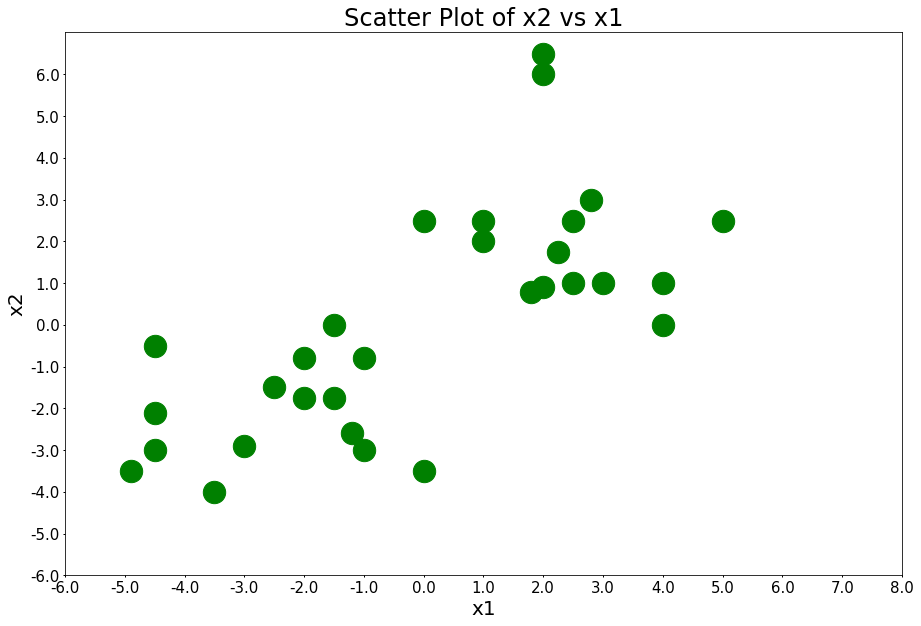

In [6]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

## Initialize k-means - randomly define clusters and add them to plot

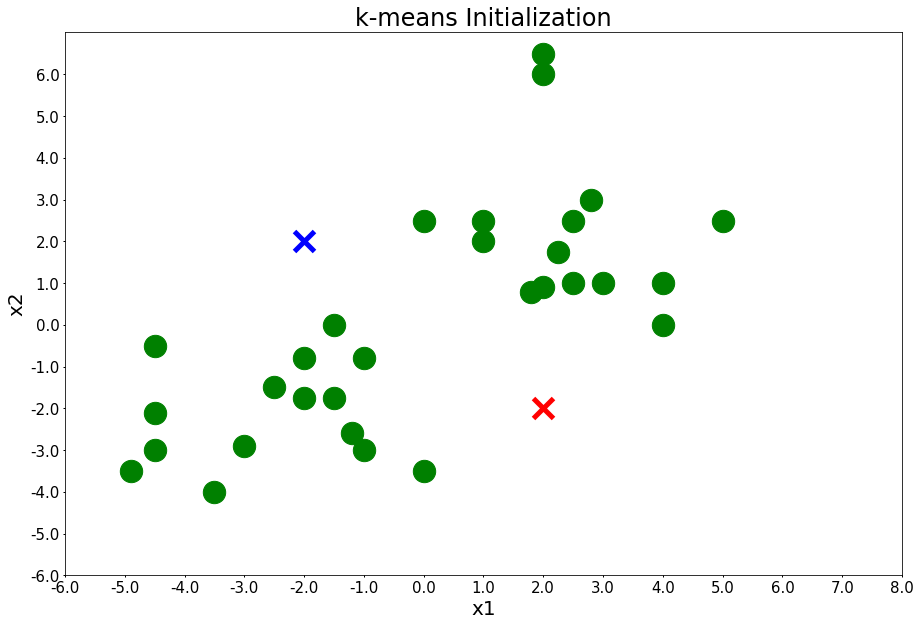

In [7]:
centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-means Initialization')

## Run k_means

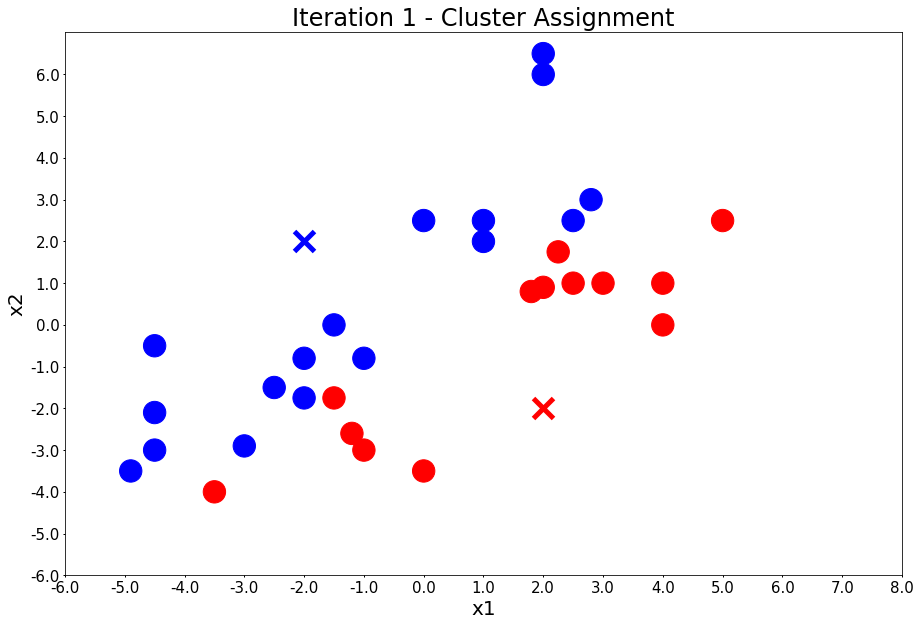

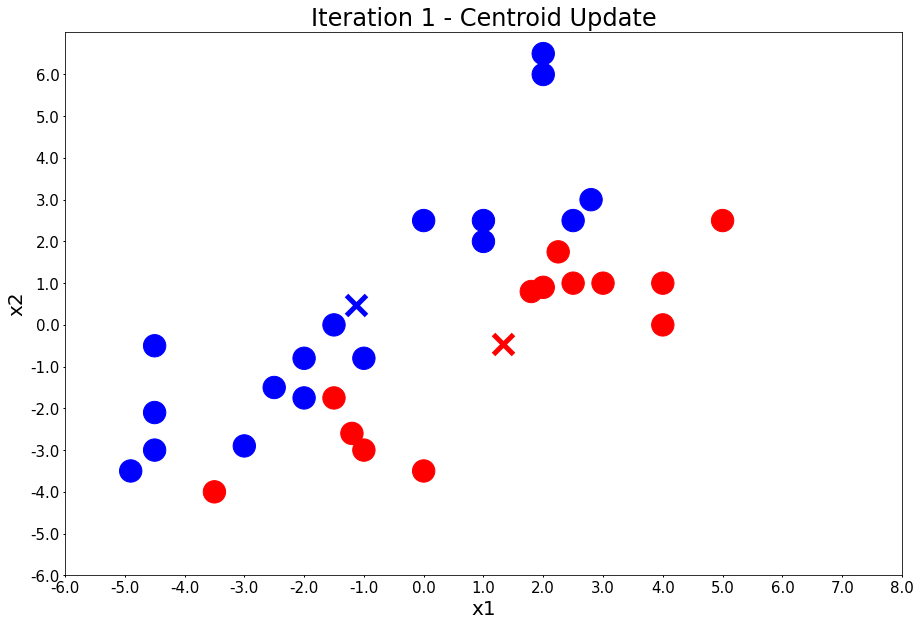

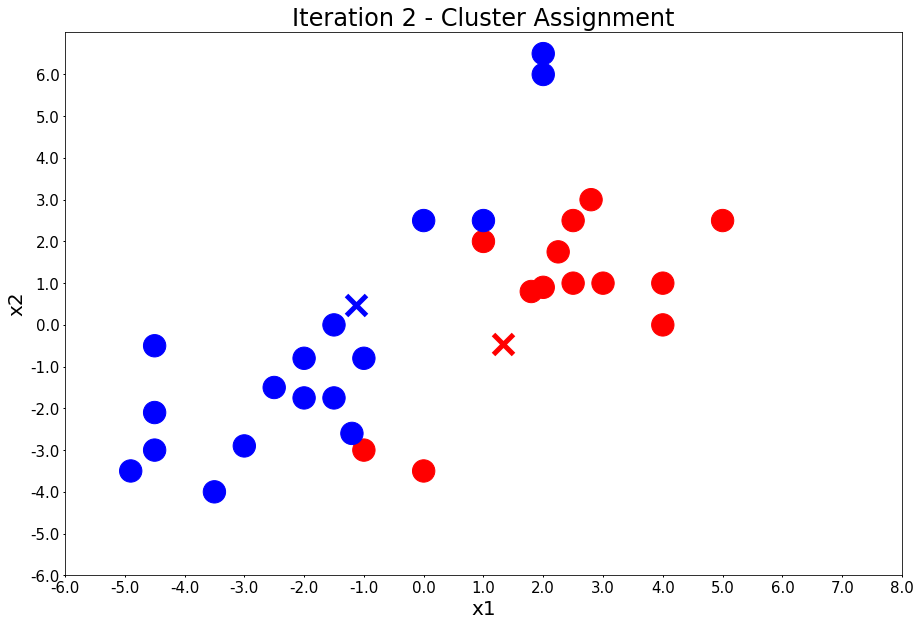

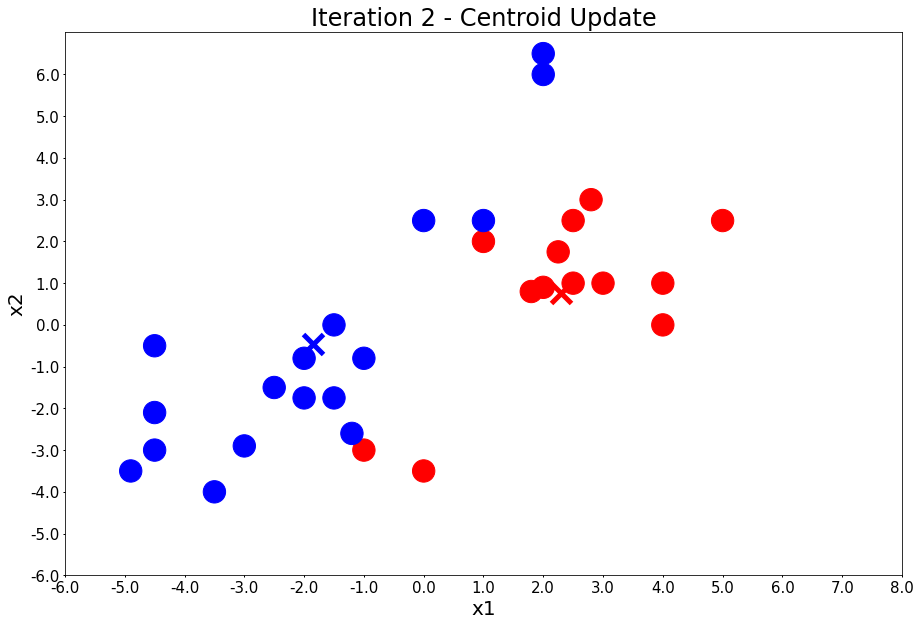

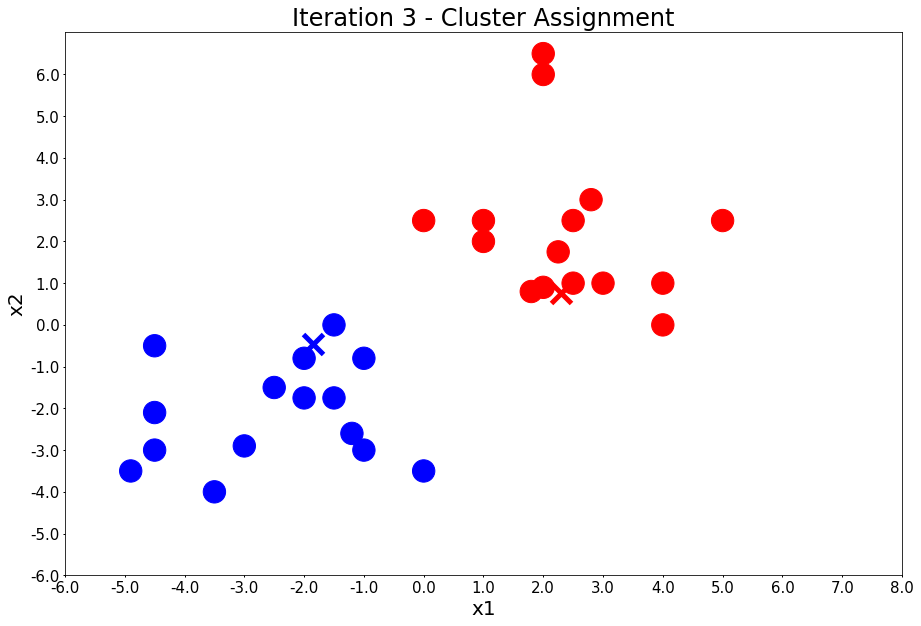

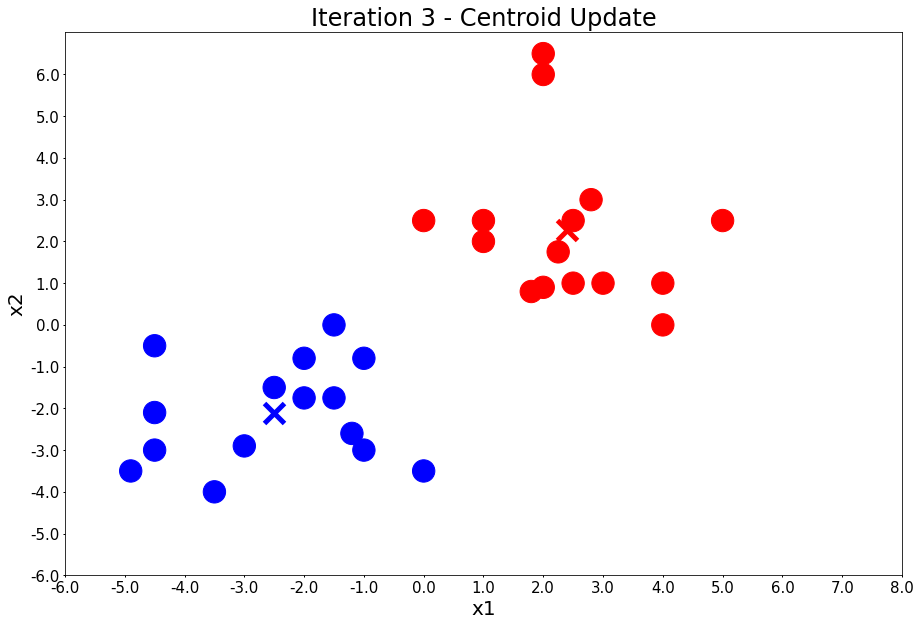

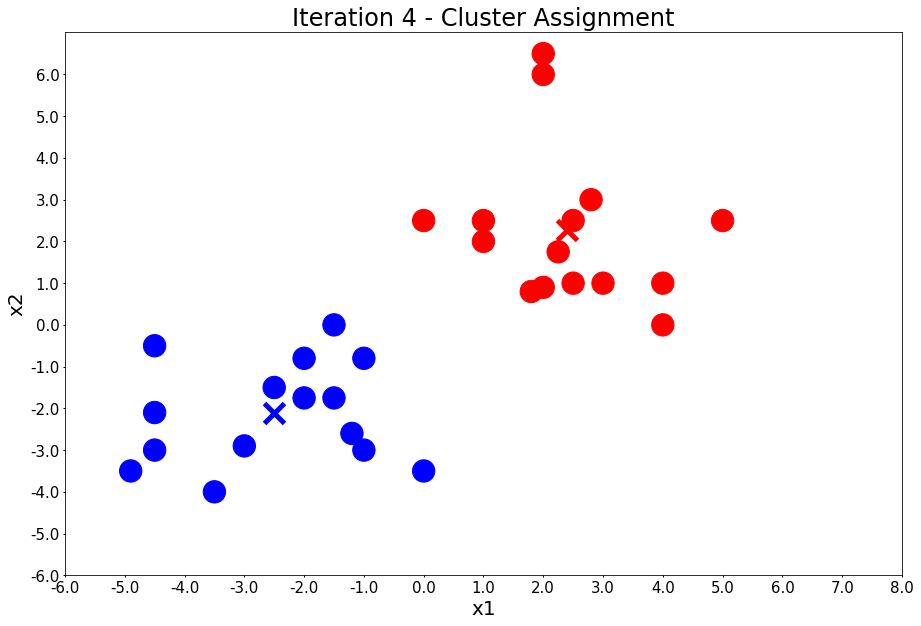

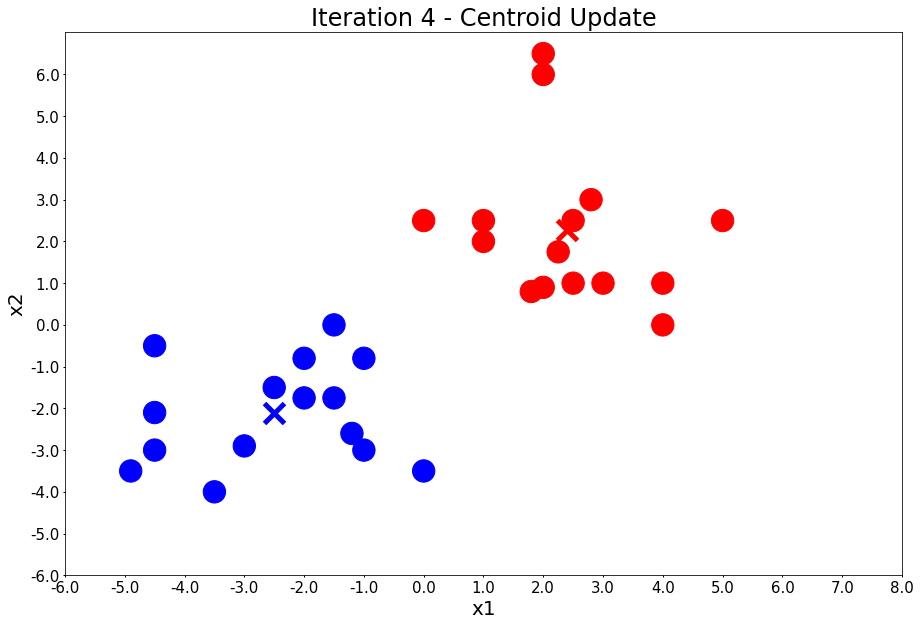

In [8]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

## Generate random points

In [9]:
np.random.seed(0)

In [10]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

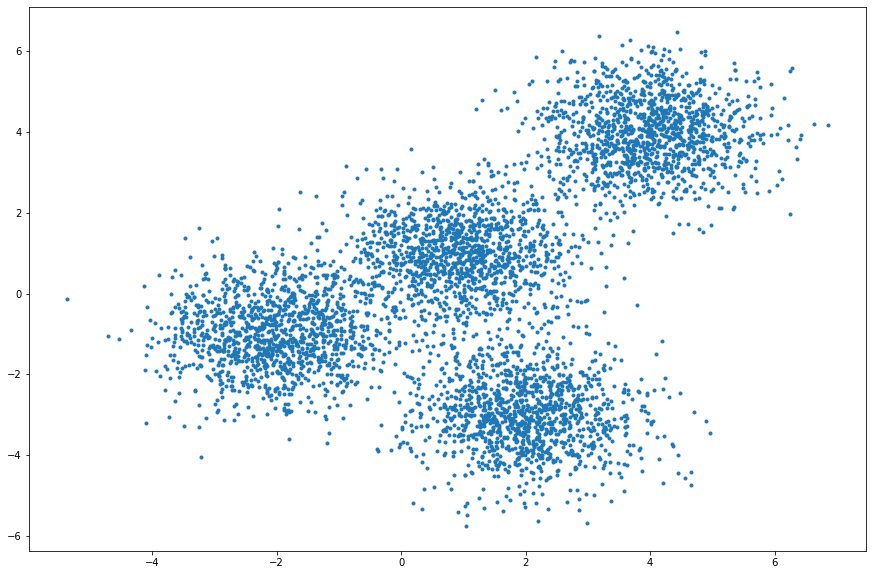

In [11]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

## Set-up k-means

In [12]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12) # run 12 times to find best group, k-means++ = smart initial center

In [13]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [14]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [15]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

## Visualizing the Resulting Clusters

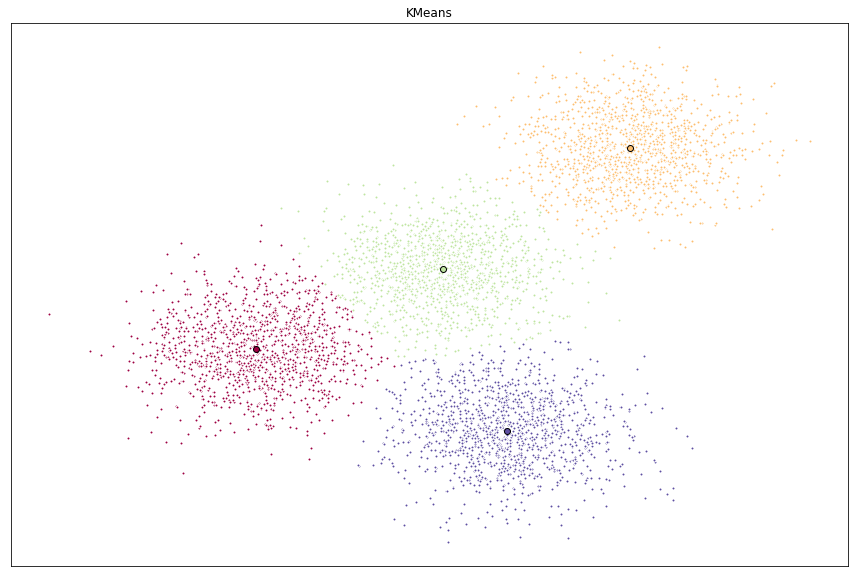

In [16]:
fig = plt.figure(figsize=(15, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(()) # remove x-axis
ax.set_yticks(()) # remove y-axis

plt.show()


# Using k-means for Customer Segmentation

In [17]:
customers_df = pd.read_csv('https://raw.githubusercontent.com/sonpn82/Coursera_Capstone/master/customer_segmentation.csv')
customers_df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

## Pre-processing

In [18]:
df = customers_df.drop('Address', axis=1)  # drop not useful column
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

## Normalization data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X = df.values[:, 1:]
X = np.nan_to_num(X)  # replace NaN with zero or very big value
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Modeling

In [21]:
num_clusters = 3

k_means = KMeans(init = 'k-means++', n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 0 1 2 0 0 2 2 2 0 1 2 2 2 1 2 2 2 0 2 2 2 1 0 0 2 2 2 2 2 2 0 1 2 2 2 1
 1 2 0 1 0 2 0 2 0 2 2 2 2 0 0 1 2 1 1 1 2 2 2 0 2 0 0 2 2 2 1 2 1 2 2 2 2
 2 2 2 2 0 2 2 1 0 2 0 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 1 0 2 1 1 0 2 2 2 2 2
 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 0 2 2 1
 2 2 2 0 1 2 2 2 2 0 1 1 2 0 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 2 1 0 1 2 2 0 1
 0 2 2 2 2 2 0 2 1 2 2 2 0 0 2 0 2 1 2 2 1 2 0 2 1 2 2 2 2 2 1 1 0 2 2 1 0
 2 2 2 2 0 2 2 1 2 2 2 2 0 2 2 1 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 1 2 1 2
 2 2 0 2 1 0 1 2 0 2 2 1 2 2 2 2 1 1 1 2 2 2 0 2 2 0 2 0 2 2 0 2 2 2 1 2 2
 1 2 1 0 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 2 1 0 2 1 2 2 2 1 1 2 2 2 0 1
 2 2 1 2 0 2 2 2 2 2 1 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 1 2 1 2 2 2 0 0 2
 1 2 0 1 1 2 2 2 1 2 2 2 2 2 0 2 0 2 2 2 2 1 2 1 2 2 2 0 2 2 2 2 1 2 2 1 1
 0 2 2 2 2 2 1 1 2 0 1 0 2 2 1 2 2 0 0 2 1 2 2 0 2 1 2 0 2 2 2 0 2 2 2 2 0
 2 1 2 2 2 2 0 1 2 2 0 2 1 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 2 0 2 1 2 2 2 1 2
 1 2 2 2 2 2 0 1 1 2 0 2 

## Insights

In [22]:
df['Labels'] = labels
df.head(5)

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Labels  
0        0.0              6.3       2  
1        0.0             12.8       0  
2        1.0             20.9       1  
3        0.0              6.3       2  
4        0.0              7.2       0

In [23]:
df.groupby('Labels').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Labels                                                                 
0        424.408163  43.000000  1.931973       17.197279  101.959184   
1        424.451807  31.891566  1.861446        3.963855   31.789157   
2        426.122905  33.817505  1.603352        7.625698   36.143389   

        Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Labels                                                     
0        4.220673    7.954483   0.162393        13.915646  
1        1.576675    2.843355   0.993939        13.994578  
2        0.853128    1.816855   0.000000         7.964991

## Each cluster can be named as 
- OLDER, HIGH INCOME, AND INDEBTED
- MIDDLE AGED, MIDDLE INCOME, AND FINANCIALLY RESPONSIBLE
- YOUNG, LOW INCOME, AND INDEBTED